# Assignment 1 PHYS7905

In [1]:
matplotlib inline

We first import qutip and other useful python libs

In [2]:
import numpy as np
from qutip import *
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt

## Question 3

Define the Hamiltonian and parameters.

In [3]:
Delta=1
H=Delta*sigmay()
p=0.1
eps=0.2
tau=np.pi/20.0
N=20

We now define the operator to exponentiate to get the unitary propagator and exponentiate it.

In [4]:
HH=-1j*tau*H
U=HH.expm()

Define $\rho$ state and measurement operators.

In [5]:
z0=basis(2,0)
z1=basis(2,1)
x0=(z0+z1)/np.sqrt(2)
x1=(z0-z1)/np.sqrt(2)
rho=(1-p)*z0*z0.dag() + p*z1*z1.dag()
M0=np.sqrt(1/2+eps)*x0*x0.dag() + np.sqrt(1/2-eps)*x1*x1.dag()
M1=np.sqrt(1/2-eps)*x0*x0.dag() + np.sqrt(1/2+eps)*x1*x1.dag()

Now we create the Bloch vector, then loop through evolving under U and then performing the measurement.  We then have a for loop that runs through the iterations, and for each iteration it multiplies the state by X, Y and Z and takes the trace to find the position in the Bloch sphere.  It adds this vector to the Bloch sphere using add_vectors.  Then it applies U for Hamiltonian evolution, and M0 and M1 for the measurements.

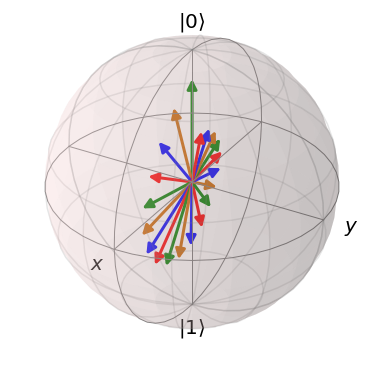

In [13]:
b=Bloch()
r1=rho
for n in range(N):
    ss1=sigmax()*r1
    ss2=sigmay()*r1
    ss3=sigmaz()*r1
    bloch=[ss1.tr().real,ss2.tr().real,ss3.tr().real]
    b.add_vectors(bloch)
    r1=U*r1*U.dag()
    r1=M0*r1*M0+M1*r1*M1
b.render()

You can see here that the vector starts closer to the surface of the Bloch sphere, then rotates and decreases in length.  What is happening is that the Hamiltonian is making the state rotate about the y-axis, but at the same time the partial measurement is gradually decohering it in the x-direction.